In [1]:
#add matplotlib inline magic command
%matplotlib inline
#dependencies and setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [4]:
# Get the columns and the rows that are not null.
city_data_df.count()
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()
# Get the data types of each column.
city_data_df.dtypes
# Get the unique values of the type of city.
city_data_df["type"].unique()
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

# Get the columns and the rows that are not null.
ride_data_df.count()
ride_data_df.isnull().sum()
# Get the data types of each column.
ride_data_df.dtypes

# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [15]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
# Create the Suburban city DataFrame.
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
# Create the Rural city DataFrame.
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df



,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [16]:
# Get the number of rides for urban cities.
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
# Get the number of rides for suburban cities.
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
# Get the number of rides for rural cities.
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count


city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [17]:
# Get average fare for each city in the urban cities.
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
# Get average fare for each city in the suburban cities.
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
# Get average fare for each city in the rural cities.
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]
print(urban_avg_fare)
print(suburban_avg_fare)
print(rural_avg_fare)

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64
city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire  

In [18]:
# Get the average number of drivers for each urban city.
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]
print(urban_driver_count)
print(suburban_driver_count)
print(rural_driver_count)


city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64
city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey 

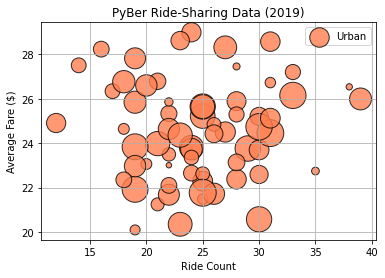

In [30]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count,
           linewidth=1,
           edgecolor="black",
           c="coral",
           alpha=0.8,
           label="Urban")
plt.legend()
plt.xlabel("Ride Count")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.title("PyBer Ride-Sharing Data (2019)")

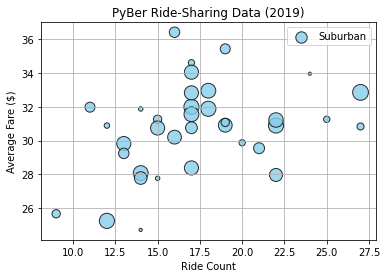

In [31]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
           linewidth=1,
           edgecolor="black",
           c="skyblue",
           alpha=0.8,
           label="Suburban")
plt.legend()
plt.xlabel("Ride Count")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.title("PyBer Ride-Sharing Data (2019)")

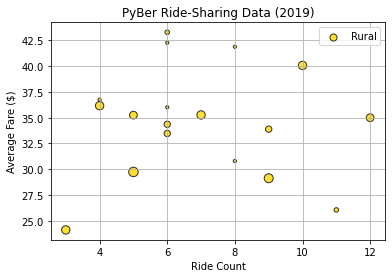

In [33]:
# Build the scatter plots for Rural cities.
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
           linewidth=1,
           edgecolor="black",
           c="gold",
           alpha=0.8,
           label="Rural")
plt.legend()
plt.xlabel("Ride Count")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.show()

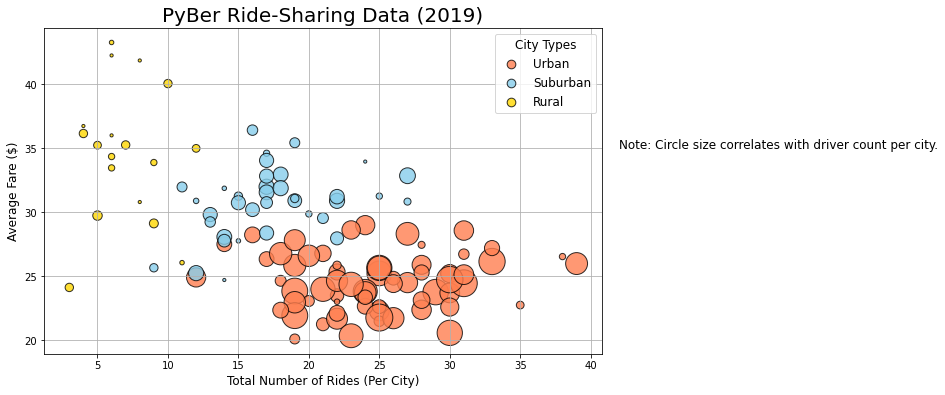

In [50]:
# Build the scatter plots for urban cities.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count,
           linewidth=1,
           edgecolor="black",
           c="coral",
           alpha=0.8,
           label="Urban")

# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
           linewidth=1,
           edgecolor="black",
           c="skyblue",
           alpha=0.8,
           label="Suburban")


# Build the scatter plots for Rural cities.
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
           linewidth=1,
           edgecolor="black",
           c="gold",
           alpha=0.8,
           label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)
plt.grid(True)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")


plt.show()

In [53]:
# Save the figure.
plt.savefig("Analysis/Fig1.png")

<Figure size 432x288 with 0 Axes>